In [1]:
## CARGO LAS FUNCIONES QUE YA HE CREADO

import pandas as pd   ## Libreria para manipular y analizar datos
from scipy.stats import skew, kurtosis  ## funciones estadísticas
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import ttest_1samp  ## Prueba t
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
import pingouin as pg ## LIbrería funciones estadísticas
import textwrap ##Para arreglar textos
import math ##Para redondear
from sklearn.linear_model import LinearRegression ##Libreria de regresiones lineales
from sklearn.metrics import mean_squared_error ## Para sacar los errores
from datetime import date

def limpieza(dataframe, limpiar = False, eliminar_duplicados = False):
    print("Se está procesando la limpieza de la base '", nombre_dataframe(dataframe),"'")
    faltantes(dataframe, limpiar)
    if eliminar_duplicados == True:
        duplicados(dataframe)
    print("-----------------------")
    print("La base final tiene", dataframe.shape[0],"registros")
    tipo_columna(dataframe)

def nombre_dataframe(dataframe):
    name = [x for x in globals() if globals()[x] is dataframe][0]
    return name
    
def faltantes(dataframe, limpiar = False):
    total_datos = dataframe.shape[0]
    print("-----------------------")
    print("La base tiene", total_datos,"registros")
    print("-----------------------")
    print("La base tiene la siguiente cantidad de datos faltantes por columna: ")
    print("-----------------------")
    eliminados = dataframe.shape[0]
    nulos = False
    for col in dataframe.columns:
        count_na = dataframe[col].isnull().sum() #Para contar los datos vacíos por columna
        perc_count_na = count_na / total_datos
        print("Nan x columna [", col, "]:", count_na,"(","{:,.1%}".format(perc_count_na),")")    
        if count_na > 0:
            nulos = True
        
    if limpiar == True:
        if nulos == 0:
            print("-----------------------")
            print("No hay datos nulos, no es necesario hacer ninguna acción")
        else:
            dataframe.dropna(inplace = True)
            dataframe.reset_index(drop = True, inplace = True)#Para eliminar todas las filas que están vacías
            print("-----------------------------------------------------------")
            print("Se eliminaron :", eliminados - dataframe.shape[0], " filas con vacíos")
        
def tipo_columna(dataframe):  
    print("-----------------------")
    print("Los tipos de columna de la base son: ")
    print("-----------------------")
    print(dataframe.info(verbose = True)) #Para comprobar que Python leyó el tipo de columna conforme al tipo de variable

def duplicados(dataframe):    
    print("-----------------------------------------------------------")
    print("Se están eliminando los duplicados")
    tamano_original = dataframe.shape[0]
    dataframe.drop_duplicates(inplace = True)  #Para eliminar los datos duplicados
    dataframe.reset_index(drop = True, inplace = True)
    tamano_sin_duplicados = dataframe.shape[0]
    duplicados = tamano_original - tamano_sin_duplicados
    print("-----------------------------------------------------------")
    print("Se eliminaron", duplicados, "duplicados")
    print("-----------------------------------------------------------")
    
    print("Se están eliminando las filas con nombres de columnas")
    print("-----------------------------------------------------------")
    tamano_original = dataframe.shape[0]
    dataframe = dataframe[(dataframe != dataframe.columns).all(axis = 1)]
    tamano_sin_indices = dataframe.shape[0]
    columnas_repetidas = tamano_original - tamano_sin_indices
    print("Se eliminaron", columnas_repetidas, "registros que repetían los nombres de columnas")

def columna_a_string(dataframe, columna):
    print("-----------------------------------------------------------")
    for columnaa in columna:
        print("Se está conviertiendo la columna",columnaa,"en formato string")
        dataframe[columnaa] = dataframe[columnaa].astype('string')

def columna_a_numeric(dataframe, columna):
    print("-----------------------------------------------------------")
    for columnaa in columna:
        print("Se está conviertiendo la columna",columnaa,"en formato decimal")
        dataframe[columnaa] = pd.to_numeric(dataframe[columnaa], errors = 'coerce')        

def columna_a_fecha(dataframe, columna, formato):
    print("-----------------------------------------------------------")
    for columnaa in columna:
        print("Se está conviertiendo la columna",columnaa,"en formato fecha")
        dataframe[columnaa] = pd.to_datetime(dataframe.loc[dataframe[columnaa].notnull(),columnaa], format = formato)        
        
def descriptivas(dataframe, columna = None): 
    print("-----------------------")
    descriptiva = []
    
    if columna is None:
        columna = pd.DataFrame(dataframe.describe()).columns.values
        
    descriptiva = pd.DataFrame(dataframe[columna].describe())
    
    for columnaa in columna:
        descriptiva.loc['coef. var',columnaa] = dataframe.loc[dataframe[columnaa].notnull(),columnaa].std()/dataframe.loc[dataframe[columnaa].notnull(),columnaa].mean()
        descriptiva.loc['coef. asi',columnaa] = skew(dataframe.loc[dataframe[columnaa].notnull(),columnaa])
        descriptiva.loc['curtosis',columnaa] = kurtosis(dataframe.loc[dataframe[columnaa].notnull(),columnaa])
    estilo_tabla(descriptiva,'Tabla de estadísticas descriptivas de ' + nombre_dataframe(dataframe))
    tam_y = min(len(descriptiva.columns.values),4)
    tam_x = math.ceil(len(descriptiva.columns.values)/tam_y)
    print(tam_y,tam_x)
    dataframe[columna].plot(kind='box', subplots=True, layout=(tam_x,tam_y), sharex=False, sharey=False, figsize=(tam_y * 5,5 * tam_x), title = 'Diagrama de Cajas y Bigotes de las variables de ' + nombre_dataframe(dataframe))
    plt.show()
        
def boxplot(dataframe, y_axis,  x_axis = None, categoria = None):
    
    print("-----------------------")
    for columnaa in y_axis:

        #Gráfico descriptivo
        alto = 5
        if x_axis is not None:
            alto = len(x_axis)
        
        fig_plot = plt.figure(figsize=(alto,5)) 
        plot = fig_plot.add_axes([0,0,1,1])

        if (x_axis is None and categoria is None):
            plot = sns.boxplot(y = dataframe.loc[dataframe[columnaa].notnull(),columnaa], palette = 'Set2')
            if(dataframe.loc[dataframe[columnaa].notnull(),columnaa].shape[0] < 1000):
                plot = sns.swarmplot(y = dataframe.loc[dataframe[columnaa].notnull(),columnaa],color='black')
            min_data = dataframe.loc[dataframe[columnaa].notnull(),columnaa].min()
            max_data = dataframe.loc[dataframe[columnaa].notnull(),columnaa].max()
            plot.set(ylim=(min_data - (min_data * 0.1), max_data + (min_data * 0.1)))
            labels = textwrap_etiquetas(plot.get_xticklabels(),10)
            plot.set_xticklabels(labels, rotation=0)
            plt.title("Diagrama de cajas y bigotes de " + columnaa)
            plt.show()

        if (x_axis is not None and categoria is None):
            for x_axi in range(len(x_axis)):
                plot = sns.boxplot(x = dataframe[x_axis[x_axi]], y = dataframe.loc[dataframe[columnaa].notnull(),columnaa], palette = 'Set2')
                if(dataframe.loc[dataframe[columnaa].notnull(),columnaa].shape[0] < 1000):
                    plot = sns.swarmplot(x = dataframe[x_axis[x_axi]], y = dataframe.loc[dataframe[columnaa].notnull(),columnaa],color='black')
                min_data = dataframe.loc[dataframe[columnaa].notnull(),columnaa].min()
                max_data = dataframe.loc[dataframe[columnaa].notnull(),columnaa].max()
                plot.set(ylim=(min_data - (min_data * 0.01), max_data + (min_data * 0.01)))
                labels = textwrap_etiquetas(plot.get_xticklabels(),10)
                plot.set_xticklabels(labels, rotation=0)
                plt.title("Diagrama de cajas y bigotes de " + columnaa)
                plt.show()
            
        if (x_axis is not None and categoria is not None):
            for x_axi in range(len(x_axis)):
                for cate in categoria:
                    plot = sns.boxplot(x = dataframe[x_axis[x_axi]], y = dataframe.loc[dataframe[columnaa].notnull(),columnaa], hue = dataframe[cate], palette = 'Set2')        
                    if(dataframe.loc[dataframe[columnaa].notnull(),columnaa].shape[0] < 1000):
                        plot = sns.swarmplot(x = dataframe[x_axis[x_axi]], y = dataframe.loc[dataframe[columnaa].notnull(),columnaa], hue = dataframe[cate], color='black')
                    min_data = dataframe.loc[dataframe[columnaa].notnull(),columnaa].min()
                    max_data = dataframe.loc[dataframe[columnaa].notnull(),columnaa].max()
                    labels = textwrap_etiquetas(plot.get_xticklabels(),10)
                    plot.set_xticklabels(labels, rotation=0)
                    plot.set(ylim=(min_data - (min_data * 0.01), max_data + (min_data * 0.01)))
                    plt.title("Diagrama de cajas y bigotes de " + columnaa)
                    plt.show()

def histograma(dataframe, x_axis, categoria = None):
    print("-----------------------")
    for columnaa in x_axis:
        #Gráfico descriptivo
        fig_plot = plt.figure() 
        plot = fig_plot.add_axes([0,0,1,1])

        if (categoria is None):
            plot = sns.histplot(x = dataframe.loc[dataframe[columnaa].notnull(),columnaa], palette = 'Set2', kde = True)

        if (categoria is not None):
            plot = sns.histplot(x = dataframe.loc[dataframe[columnaa].notnull(),columnaa], hue = dataframe[categoria[0]], palette = 'Set2', kde = True)

        min_data = dataframe.loc[dataframe[columnaa].notnull(),columnaa].min()
        max_data = dataframe.loc[dataframe[columnaa].notnull(),columnaa].max()
        
        labels = textwrap_etiquetas(plot.get_xticklabels(),10)
        plot.set_xticklabels(labels, rotation=0) 
        plt.title("Histograma de " + columnaa)
        plt.show()
    
def barras(dataframe, x, y, categoria = None):
    
    if len(dataframe[x].unique()) <= 2 and categoria is None:
        
        plt.figure(figsize = (6, 6))
        plt.pie(x = dataframe[y], labels = dataframe[x], autopct = labels_intpct(dataframe[y], torta = True), colors = sns.color_palette('Set2'), startangle = 90, pctdistance = 0.4)
        plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
        plt.title("Diagrama de torta de " + x)
        plt.show()
        
    else:
        
        fig_plot = plt.figure() 
        plot = fig_plot.add_axes([0,0,1,1])

        if (categoria is None):
            plot = sns.barplot(x = dataframe[x], y = dataframe[y], palette = 'Set2')

        if (categoria is not None):
            plot = sns.barplot(x = dataframe[x], y = dataframe[y], hue = dataframe[categoria], palette = 'Set2')
            
        etiquetas = labels_intpct(dataframe[y]) 
        plot.bar_label(plot.containers[0], label_type = 'edge', labels = etiquetas) 
        labels = textwrap_etiquetas(plot.get_xticklabels(),10)
        plot.set_xticklabels(labels, rotation=0)    
        plt.title("Diagrama de barras de " + x)
        plt.show()

def labels_intpct(valores, torta = False):
    if torta == True:
        def autopct(pct):
            total = sum(valores)
            val = int(round(pct*total/100.0))
            return '{v:,d} ({p:.2f}%)'.format(p = pct,v = val)
        return autopct
    else:
        labels = [] 
        for val in range(0,len(valores)):
            pct = valores[val] / sum(valores)
            labels.append('{v:,d} ({p:.2%})'.format(p = pct,v = valores[val]))
        return labels

def tabla_frecuencias(dataframe, columna = None):
    if columna is None:
        columna = dataframe.select_dtypes(exclude=['int', 'float']).columns.tolist()
    
    print("-----------------------")
    print("Las estadísticas descriptivas de la(s) variable(s) cualitativa(s) son:")
    for col in columna:
        tabla_frec = pd.crosstab(index = dataframe[col], columns = 'count').reset_index()
        tabla_frec.rename({'count' : 'Frec. Abs.'}, inplace = True, axis = 1)
        tabla_frec['Frec. Rel.'] = tabla_frec['Frec. Abs.'] / sum(tabla_frec['Frec. Abs.'])
        tabla_frec = tabla_frec.sort_values(by ='Frec. Abs.',ascending=False).reset_index(drop=True)
        tabla_frec[col] = tabla_frec[col].astype(str)
        print("-----------------------")
        print(col)
        display(tabla_frec.style.format({"Frec. Rel." : "{:,.2%}","Frec. Abs." : "{:,.0f}"}).hide().set_caption('Tabla de frecuencias de ' + col).set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px'),('font-weight','bold')]}]))
        barras(tabla_frec, col, 'Frec. Abs.')
        
def estilo_tabla(dataframe, titulo, hide = False):
    col_numericas = list(dataframe.select_dtypes(include=[np.number]).columns.values)
    format_col_dic = {}
    for col in col_numericas: format_col_dic[col] = "{:,.2f}"
    if hide == False:
        display(dataframe.style.format(format_col_dic).set_caption(titulo).set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px'),('font-weight','bold')]}]))
    else:
        display(dataframe.style.format(format_col_dic).hide().set_caption(titulo).set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px'),('font-weight','bold')]}]))
        
def comparacion_cuanti_cauali(dataframe, numerica, cualitativas):
    for valor in numerica:
        for categoria in cualitativas:
            
            normalidad = prueba_normalidad(dataframe, valor.split(), categoria.split())
            if (all(normalidad) == True):
                normalidad = True
            else:
                normalidad = False
                print("Las poblaciones ",normalidad[normalidad['norm'] == False].index(),"no siguen una distribución normal")
                
            varianzas = prueba_varianzas(dataframe, valor.split(), categoria.split())
            if (normalidad == True) & (varianzas == True):
                print("-----------------------")
                print("Comparación de las medias poblacionales de " + categoria + " en la variable " + valor)
                print("Las poblaciones pasaron el test de normalidad y varianzas")
                comparacion_medias_normalidad(dataframe, valor.split(), categoria.split())
            
def prueba_normalidad(dataframe, numerica, cualitativas):
  
    ## QQplots
    for valor in numerica:
        for categoria in cualitativas:
            categorias = list(dataframe[categoria].unique())
            fig, axs = plt.subplots(ncols=len(categorias))
            fig.set_size_inches(15, 5)
            fig.subplots_adjust(wspace=0.3)
            
            
            for poblacion in categorias:
                fig = qqplot(dataframe[dataframe[categoria] == poblacion][valor], line='s',ax = axs[categorias.index(poblacion)])
                axs[categorias.index(poblacion)].set_title(poblacion)
            plt.suptitle("QQplot de " + str(numerica) + " vs")
            plt.show()

            # Pruebas de Shapiro-Wilks
            print("-----------------------")
            print("Prueba de Shapiro-Wilks")
            print('')
            normalidad = pd.DataFrame(columns = ['norm'])
            for poblacion in categorias:
                print("Población: "+ poblacion)
                Estad, vp = shapiro(dataframe[dataframe[categoria] == poblacion][valor])
                print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
                print('')
                if((len(cualitativas) == 1) & (len(numerica) == 1)):
                    if (vp < 0.05) & (dataframe[dataframe[categoria] == poblacion].shape[0] < 30):
                        normalidad.loc[poblacion, 'norm'] = False
                    else:
                        normalidad.loc[poblacion, 'norm'] = True
            if(len(normalidad) > 0):
                return normalidad
            
# Homogeneidad de varianzas (Prueba Levene)
def prueba_varianzas(dataframe, numerica, cualitativas):
    for valor in numerica:
        for categoria in cualitativas:
            temporal = []
            for poblacion in list(dataframe[categoria].unique()):
                temporal.append(dataframe[dataframe[categoria] == poblacion][valor])
            Estad,vp = levene(*temporal,center='mean')
            print("-----------------------")
            print("Prueba de levene para " + valor + " por " + categoria)
            print('')
            print(f'Estadístico W= {Estad}, Valor-p= {vp}')
            if((len(cualitativas) == 1) & (len(numerica) == 1)):
                if (vp < 0.05):
                    return False
                else:
                    return True

# Comparación de Medias Poblacionales que cumplen supuestos 
def comparacion_medias_normalidad(dataframe, numerica, cualitativas):    
    for valor in numerica:
        for categoria in cualitativas:
            temporal = []
            for poblacion in list(dataframe[categoria].unique()):
                temporal.append(dataframe[dataframe[categoria] == poblacion][valor])
            
            #Prueba ANOVA (libreria stats)
            Estad,vp = f_oneway(*temporal)
            print("-----------------------")
            print("Prueba ANOVA para " + valor + " por " + categoria)
            print('')
            print(f'Estadístico F= {Estad}, Valor-p= {vp}')
            
            if vp < 0.05:
                print('')
                print("Con un 95% de confianza, puedo afirmar que las medias poblaciones de " + valor + " por " + categoria + " son distintas\nPero, ¿cuáles?")
                # Prueba HSD Tukey
                df = pg.pairwise_tukey(data = dataframe, dv = valor, between = categoria)
                print("-----------------------")
                estilo_tabla(df.iloc[:,np.r_[0:4,7]],"Prueba de HSD Tukey para " + valor + " por " + categoria, hide = True)
                for i in df.index:
                    if (df.iloc[i,7] < 0.05):
                        print("Con un 95% de confianza, podemos afirmar que SI existe una diferencia en " + valor + " entre las poblaciones " + df.iloc[i,0] + " y " + df.iloc[i,1])
                    else:
                        print("Con un 95% de confianza, podemos afirmar que NO existe una diferencia en " + valor + " entre las poblaciones " + df.iloc[i,0] + " y " + df.iloc[i,1])
            else:
                print('')
                print("Con un 95% de confianza, no hay evidencia suficiente para afirmar que las medias poblacionales de " + valor + " por\n" + categoria + " son distintas.")
            
def minimos_maximos(dataframe, columnas, metodologia, desviaciones = 2):
    global minimos_atipicos
    global maximos_atipicos
    
    if 'minimos_atipicos' not in globals():
        minimos_atipicos = {}
        maximos_atipicos = {}
    print("-----------------------")    
    for variable in columnas:
        if metodologia == 'Cajas':
            m = max(min(dataframe[variable]), dataframe[variable].quantile(q = 0.25) - 1.5 * (dataframe[variable].quantile(q = 0.75) - dataframe[variable].quantile(q = 0.25)))
            n = min(max(dataframe[variable]), dataframe[variable].quantile(q = 0.75) + 1.5 * (dataframe[variable].quantile(q = 0.75) - dataframe[variable].quantile(q = 0.25)))
            minimos_atipicos[variable] = m
            maximos_atipicos[variable] = n

        if metodologia == 'Desviacion':
            m = max(min(dataframe[variable]), dataframe[variable].mean() - desviaciones * dataframe[variable].std())
            n = min(max(dataframe[variable]), dataframe[variable].mean() + desviaciones * dataframe[variable].std())
            minimos_atipicos[variable] = m
            maximos_atipicos[variable] = n

        print("El mínimo de " + variable + " es " + "{:,.1f}".format(m) + " y el máximo es " + "{:,.1f}".format(n))

def textwrap_etiquetas(texto, ancho, palabras_largas = False):
    labels = []
    for label in texto:
        text = label.get_text()
        labels.append(textwrap.fill(text, width = ancho,
        break_long_words = palabras_largas))
    return labels
        
def text_wrap(textos, ancho, palabras_largas = False):
    labels = []
    for label in textos:
        labels.append(textwrap.fill(label, width = ancho,
        break_long_words = palabras_largas))
    return labels

def regresion_lineal(dataframe, x, y, intercept = True):
    global coef_reg
    global errores_reg
    
    if 'coef_reg' not in globals():
        coef_reg = {}
        errores_reg = {}
    
    model = LinearRegression(fit_intercept = intercept).fit(dataframe[x], dataframe[y])
    coeficientes = model.coef_[0]
    intercepto = model.intercept_
    
    if intercept == True:
        intercepto = intercepto[0]
        r = 1 - (1 - model.score(dataframe[x], dataframe[y])) * (len(dataframe[y]) - 1) / (len(dataframe[y]) - dataframe[x].shape[1]-1)
        
    else:
        r = 1 - (((dataframe[y] - model.predict(dataframe[x])) ** 2).sum() / (dataframe[y] ** 2).sum())
        r = r[0]
    coef = {}
    
    for i in range(len(coeficientes)):
        coef[dataframe[x].columns.values[i]] = coeficientes[i] 
    coef_reg[nombre_dataframe(dataframe)] = coef
    
    print("-----------------------")
    print("Los coeficientes de la regresión son: " + str(coef) + "\nEl intercepto es: " + "{:,.2f}".format(intercepto) + "\nEl R2 es: " + "{:,.2%}".format(r))
    
    errores_reg[nombre_dataframe(dataframe)] = np.sqrt(mean_squared_error(dataframe[y], model.predict(dataframe[x])))
    
    if len(coeficientes) == 1:
        plt.scatter(dataframe[x], dataframe[y])
        plt.xlabel(dataframe[x].columns.values)
        plt.ylabel(dataframe[y].columns.values)
        plt.title("Relación entre " + dataframe[y].columns.values + " y " + dataframe[x].columns.values)
        plt.plot(dataframe[x], model.predict(dataframe[x]), color='red', label='Regresión Lineal')
        plt.grid(True)
        plt.show()
        
def correlacion(dataframe):
    ax = plt.axes()
    corrmat = dataframe.corr()
    hm = sns.heatmap(corrmat, 
                 cbar = True, 
                 annot = True, 
                 square = True, 
                 fmt = '.2f', 
                 annot_kws = {'size': 10}, 
                 yticklabels = text_wrap(dataframe.columns, 10),
                 xticklabels = text_wrap(dataframe.columns, 10),
                 cmap = "Spectral_r",
                 ax = ax)  
    ax.set_title('Mapa de calor de las correlaciones de ' + nombre_dataframe(dataframe))
    plt.show()

- Mauricio García Quintero
- Daniel Felipe Cortés Roa
- David Rodríguez Sánchez

In [2]:
base = pd.read_csv("SABERTYT20162.csv", encoding = 'latin-1', delimiter = ';') #Cargar archivo
base = base.iloc[:,np.r_[1:4,9:15,84,87,90,93,94,97,101:102,103]] #Quedarme con el dataframe de interés
base = base[base['ESTU_NACIONALIDAD'] == '1 COLOMBIA'] #Filtrar colombianos
base = base.drop(columns = ['ESTU_NACIONALIDAD']) #Desechar la columna que no ya no necesito
base = base[base['ESTU_ESTADO'] == 'PUBLICAR'] #Filtrar los publicados
base = base.drop(columns = ['ESTU_ESTADO']).reset_index(drop = True) #Desechar la columna que ya no necesito
display(base)
columna_a_fecha(base,['ESTU_FECHANACIMIENTO'],'%d/%m/%Y') #Convertir columna a tipo fecha
tipo_columna(base)

/var/folders/lp/213xnwz127gfhjsyrl8xsj4cfr84gp/T/ipykernel_53209/2139250597.py:1: DtypeWarning: Columns (11,12,14,61) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv("SABERTYT20162.csv", encoding = 'latin-1', delimiter = ';') #Cargar archivo


,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_AUTISMO,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,NSE
0,M,15/08/1990,NaN,NaN,NaN,NaN,NaN,NaN,80,114,100,115,A2,121.0,NSE3
1,M,26/09/1990,NaN,NaN,NaN,NaN,NaN,NaN,122,112,100,112,A2,123.0,NSE4
2,F,28/10/1994,NaN,NaN,NaN,NaN,NaN,NaN,115,117,123,144,B1,99.0,NSE2
3,F,24/09/1979,NaN,NaN,NaN,NaN,NaN,NaN,82,101,85,88,A1,75.0,NSE3
4,M,6/07/1988,NaN,NaN,NaN,NaN,NaN,NaN,95,106,84,79,A1-,86.0,NSE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52660,M,22/01/1992,NaN,NaN,NaN,NaN,NaN,NaN,69,54,54,91,A1,104.0,NSE1
52661,M,7/07/1992,NaN,NaN,NaN,NaN,NaN,NaN,58,41,65,97,A1,75.0,NSE1
52662,M,7/09/1988,NaN,NaN,NaN,NaN,NaN,NaN,106,101,102,88,A1,60.0,NSE4
52663,F,2/02/1994,NaN,NaN,NaN,NaN,NaN,NaN,113,110,92,99,A1,122.0,NSE4


-----------------------------------------------------------
Se está conviertiendo la columna ESTU_FECHANACIMIENTO en formato fecha
-----------------------
Los tipos de columna de la base son: 
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52665 entries, 0 to 52664
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_GENERO                    52663 non-null  object        
 1   ESTU_FECHANACIMIENTO           52664 non-null  datetime64[ns]
 2   ESTU_ETNIA                     3086 non-null   object        
 3   ESTU_LIMITA_MOTRIZ             46 non-null     object        
 4   ESTU_LIMITA_INVIDENTE          4 non-null      object        
 5   ESTU_LIMITA_CONDICIONESPECIAL  7 non-null      object        
 6   ESTU_LIMITA_SORDO              29 non-null     object        
 7   ESTU_LIMITA_AUTISMO            3 non-null      object        
 8  

In [3]:
#Sacar la condición de cumplimiento de inglés
base['CUMP_INGLES'] = np.where((base['MOD_INGLES_DESEM'] == 'B1') | (base['MOD_INGLES_DESEM'] == 'B2'), 'CUMPLE', "NO CUMPLE")

-----------------------
Las estadísticas descriptivas de la(s) variable(s) cualitativa(s) son:
-----------------------
ESTU_LIMITA_MOTRIZ


ESTU_LIMITA_MOTRIZ,Frec. Abs.,Frec. Rel.
x,46,100.00%


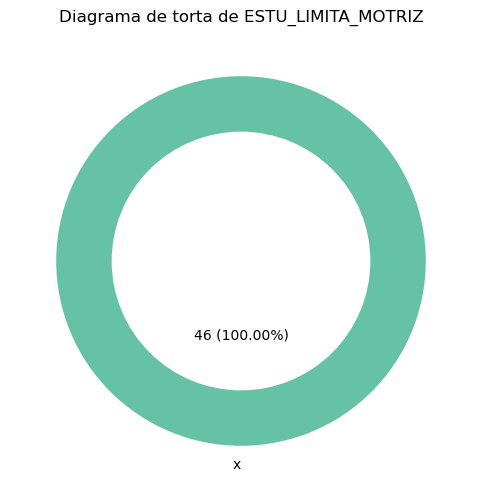

-----------------------
ESTU_LIMITA_INVIDENTE


ESTU_LIMITA_INVIDENTE,Frec. Abs.,Frec. Rel.
x,4,100.00%


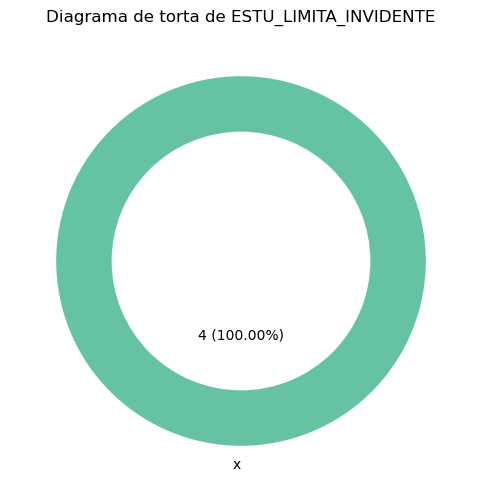

-----------------------
ESTU_LIMITA_CONDICIONESPECIAL


ESTU_LIMITA_CONDICIONESPECIAL,Frec. Abs.,Frec. Rel.
x,7,100.00%


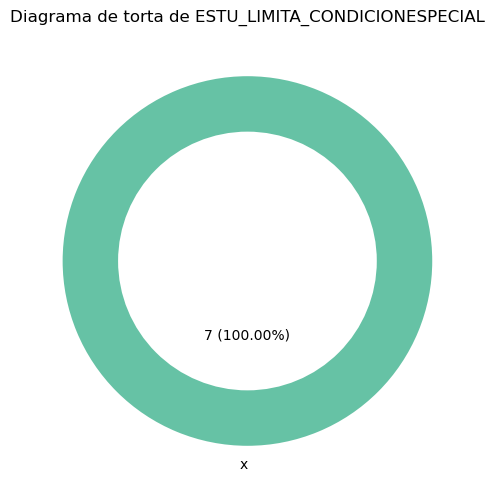

-----------------------
ESTU_LIMITA_SORDO


ESTU_LIMITA_SORDO,Frec. Abs.,Frec. Rel.
x,29,100.00%


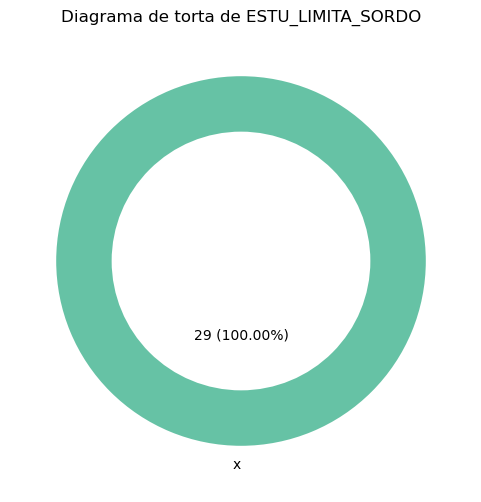

-----------------------
ESTU_LIMITA_AUTISMO


ESTU_LIMITA_AUTISMO,Frec. Abs.,Frec. Rel.
x,3,100.00%


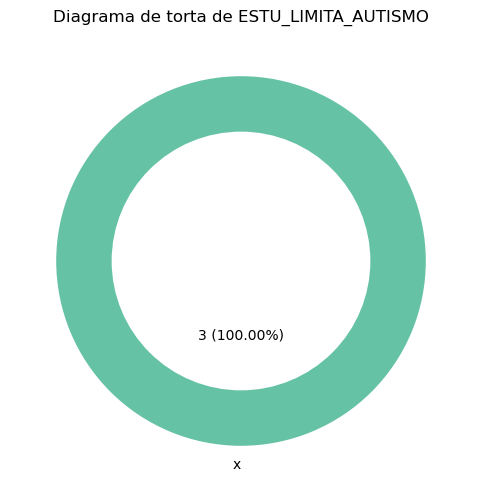

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_ETNIA,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,NSE,CUMP_INGLES,DISCAPACIDAD
0,M,1990-08-15,NaN,80,114,100,115,A2,121.0,NSE3,NO CUMPLE,SIN DISCAPACIDAD
1,M,1990-09-26,NaN,122,112,100,112,A2,123.0,NSE4,NO CUMPLE,SIN DISCAPACIDAD
2,F,1994-10-28,NaN,115,117,123,144,B1,99.0,NSE2,CUMPLE,SIN DISCAPACIDAD
3,F,1979-09-24,NaN,82,101,85,88,A1,75.0,NSE3,NO CUMPLE,SIN DISCAPACIDAD
4,M,1988-07-06,NaN,95,106,84,79,A1-,86.0,NSE1,NO CUMPLE,SIN DISCAPACIDAD
...,...,...,...,...,...,...,...,...,...,...,...,...
52660,M,1992-01-22,NaN,69,54,54,91,A1,104.0,NSE1,NO CUMPLE,SIN DISCAPACIDAD
52661,M,1992-07-07,NaN,58,41,65,97,A1,75.0,NSE1,NO CUMPLE,SIN DISCAPACIDAD
52662,M,1988-09-07,NaN,106,101,102,88,A1,60.0,NSE4,NO CUMPLE,SIN DISCAPACIDAD
52663,F,1994-02-02,NaN,113,110,92,99,A1,122.0,NSE4,NO CUMPLE,SIN DISCAPACIDAD


SIN DISCAPACIDAD    52587
CON DISCAPACIDAD       78
Name: DISCAPACIDAD, dtype: int64

In [4]:
#Resumir las discapacidades en una sola
tabla_frecuencias(base,base.iloc[:,3:8].columns) #Identificar como vienen las discapacidades
base['DISCAPACIDAD'] = np.where((base.iloc[:,3:8] == 'x').any(axis = 1), 'CON DISCAPACIDAD', "SIN DISCAPACIDAD")
base.drop(base.iloc[:,3:8], axis = 1, inplace = True)
display(base)
base['DISCAPACIDAD'].value_counts()

In [5]:
# Sacar la edad de la muestra
base['momento a la prueba'] = pd.to_datetime('9/10/2016', format = '%d/%m/%Y')
base['EDAD'] = np.where(base['ESTU_FECHANACIMIENTO'].notnull(), np.floor((base['momento a la prueba'] - base['ESTU_FECHANACIMIENTO']).dt.days/365), None)
columna_a_numeric(base,['EDAD'])
base.drop(columns = ['ESTU_FECHANACIMIENTO','momento a la prueba'], inplace = True)

-----------------------------------------------------------
Se está conviertiendo la columna EDAD en formato decimal


In [6]:
base['ESTU_ETNIA'].replace(to_replace = '100 Ninguno', value = None, inplace = True)
base['ESTU_ETNIA'].value_counts()
limpieza(base)

Se está procesando la limpieza de la base ' base '
-----------------------
La base tiene 52665 registros
-----------------------
La base tiene la siguiente cantidad de datos faltantes por columna: 
-----------------------
Nan x columna [ ESTU_GENERO ]: 2 ( 0.0% )
Nan x columna [ ESTU_ETNIA ]: 51210 ( 97.2% )
Nan x columna [ MOD_RAZONA_CUANTITAT_PUNT ]: 0 ( 0.0% )
Nan x columna [ MOD_LECTURA_CRITICA_PUNT ]: 0 ( 0.0% )
Nan x columna [ MOD_COMPETEN_CIUDADA_PUNT ]: 0 ( 0.0% )
Nan x columna [ MOD_INGLES_PUNT ]: 0 ( 0.0% )
Nan x columna [ MOD_INGLES_DESEM ]: 0 ( 0.0% )
Nan x columna [ MOD_COMUNI_ESCRITA_PUNT ]: 770 ( 1.5% )
Nan x columna [ NSE ]: 753 ( 1.4% )
Nan x columna [ CUMP_INGLES ]: 0 ( 0.0% )
Nan x columna [ DISCAPACIDAD ]: 0 ( 0.0% )
Nan x columna [ EDAD ]: 1 ( 0.0% )
-----------------------
La base final tiene 52665 registros
-----------------------
Los tipos de columna de la base son: 
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52665 entries, 0 to 52

-----------------------


,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,EDAD
count,"52,665.00","52,665.00","52,665.00","52,665.00","51,895.00","52,664.00"
mean,96.48,95.80,97.99,100.03,100.04,24.98
std,21.76,22.68,22.22,21.41,20.09,6.97
min,0.00,0.00,0.00,0.00,49.00,-8.00
25%,81.00,81.00,82.00,85.00,85.00,20.00
50%,96.00,97.00,99.00,98.00,102.00,23.00
75%,111.00,112.00,114.00,112.00,115.00,28.00
max,200.00,200.00,200.00,200.00,200.00,71.00
coef. var,0.23,0.24,0.23,0.21,0.20,0.28
coef. asi,0.11,-0.12,-0.10,0.30,0.05,1.51


4 2


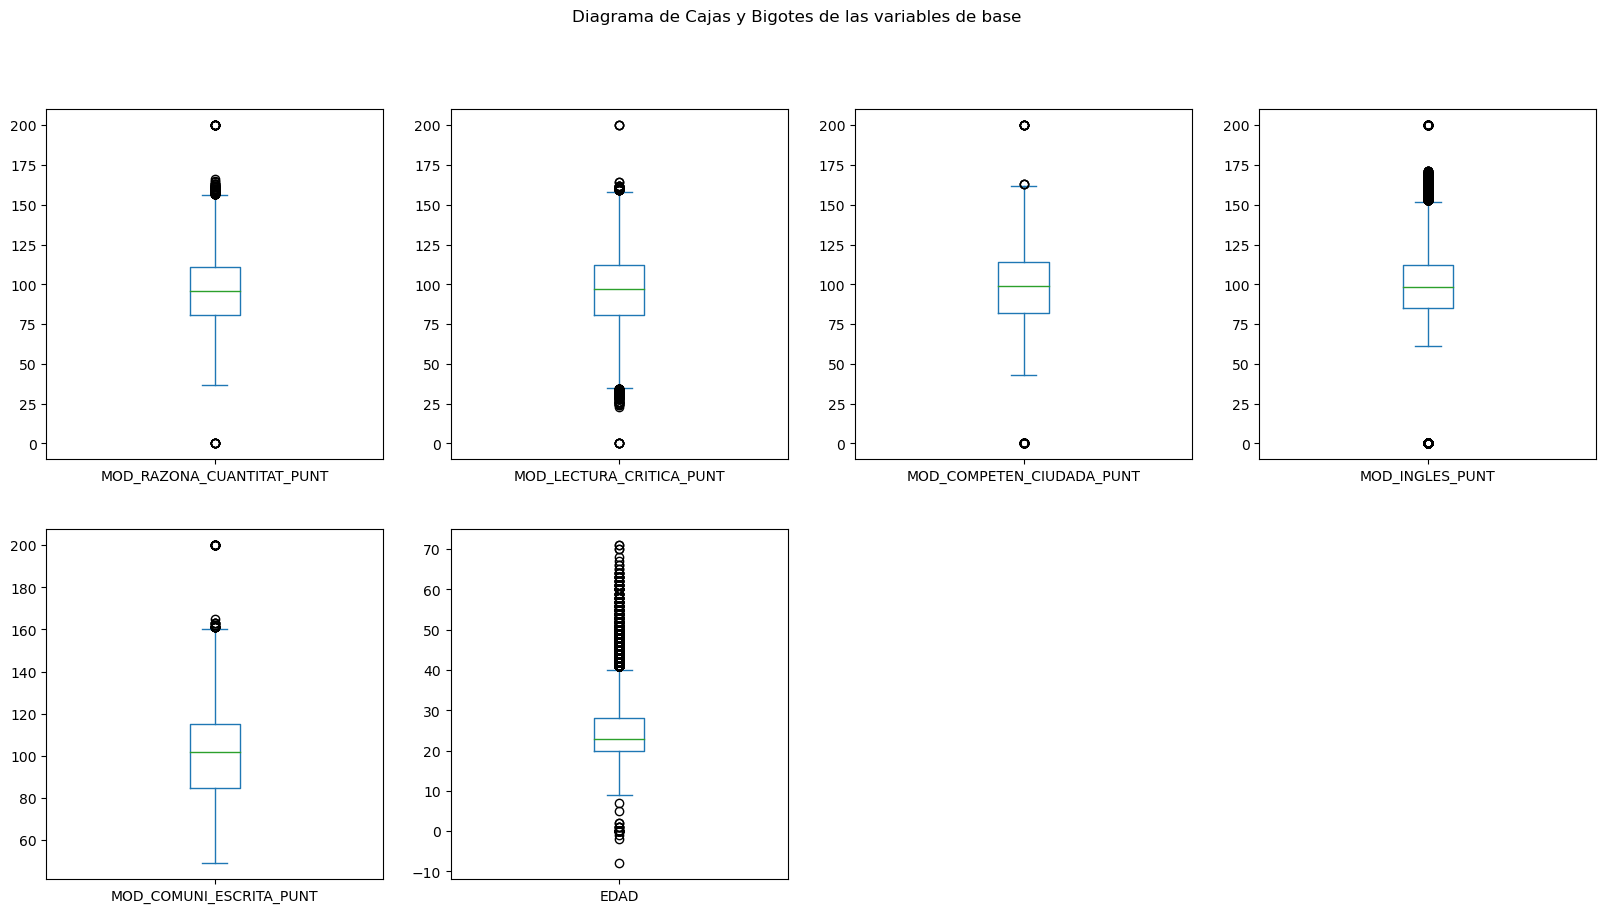

In [7]:
descriptivas(base)

-----------------------
Las estadísticas descriptivas de la(s) variable(s) cualitativa(s) son:
-----------------------
ESTU_GENERO


ESTU_GENERO,Frec. Abs.,Frec. Rel.
M,"27,996",53.16%
F,"24,667",46.84%


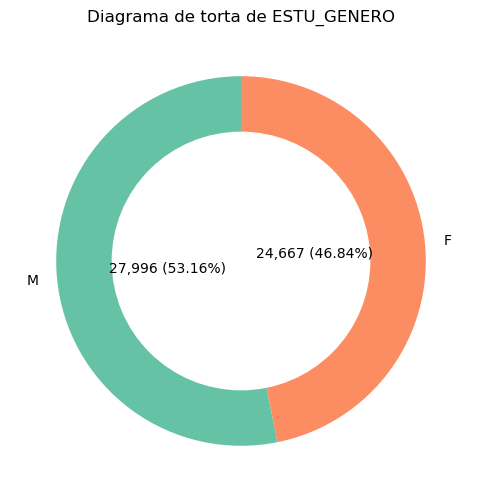

-----------------------
ESTU_ETNIA


ESTU_ETNIA,Frec. Abs.,Frec. Rel.
1 Comunidad afrodescendiente,681,46.80%
19 Otro grupo étnico minoritario,445,30.58%
4 Paez,72,4.95%
18 Zenú,57,3.92%
9 Pasto,42,2.89%
2 Raizal,40,2.75%
6 Embera,32,2.20%
7 Pijao,21,1.44%
8 Wayúu,19,1.31%
11 Inga,16,1.10%


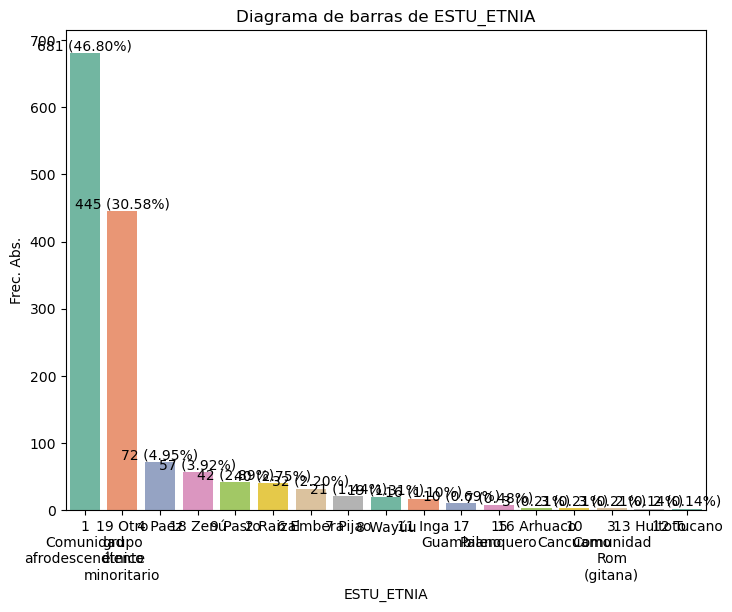

-----------------------
MOD_INGLES_DESEM


MOD_INGLES_DESEM,Frec. Abs.,Frec. Rel.
A1,"18,799",35.70%
A2,"13,540",25.71%
A1-,"12,965",24.62%
B1,"5,995",11.38%
B2,"1,366",2.59%


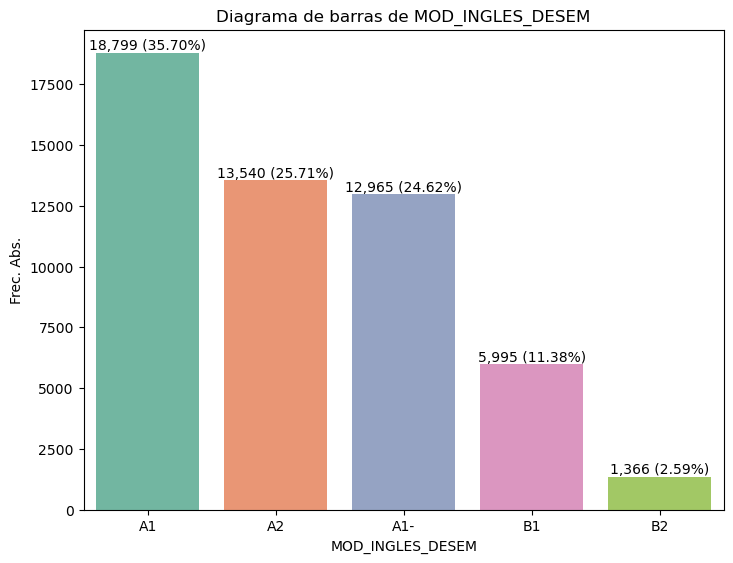

-----------------------
NSE


NSE,Frec. Abs.,Frec. Rel.
NSE2,"20,132",38.78%
NSE1,"13,838",26.66%
NSE4,"10,696",20.60%
NSE3,"7,246",13.96%


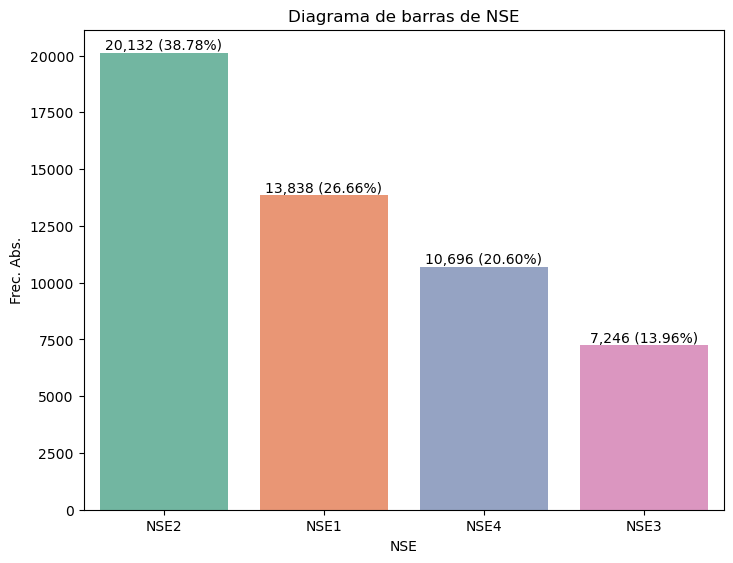

-----------------------
CUMP_INGLES


CUMP_INGLES,Frec. Abs.,Frec. Rel.
NO CUMPLE,"45,304",86.02%
CUMPLE,"7,361",13.98%


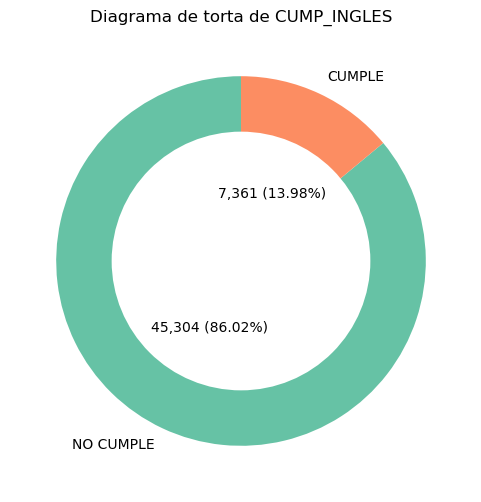

-----------------------
DISCAPACIDAD


DISCAPACIDAD,Frec. Abs.,Frec. Rel.
SIN DISCAPACIDAD,"52,587",99.85%
CON DISCAPACIDAD,78,0.15%


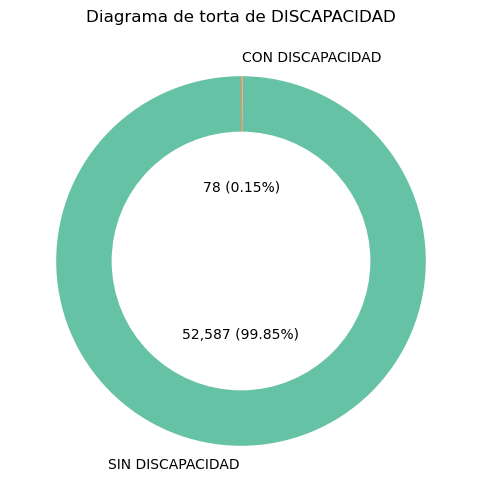

In [8]:
tabla_frecuencias(base)
#El diagrama de barras de la etnia no aporta mucho porque son demasiadas etiquetas y no se puede leer bien